In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('data.csv', encoding = 'latin1')
df.head(5)

/tmp/ipython-input-2417226909.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv', encoding = 'latin1')


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [32]:
data = df['no2'].dropna().values

z = T_r(x) = x + a_rsin(b_rx)

r=102317250

a_r = 0.05 ∗ (r mod 7)
    =0.05*0

b_r = 0.3 ∗ (r mod 5 + 1)
    = 0.3*(0+1)
    = 0.3

z=x+0sin(0.3x)

z=x

In [33]:
z = data.reshape(-1, 1)

In [34]:
z_mean = np.mean(z)
z_std = np.std(z)
z_normalized = (z - z_mean) / z_std

In [35]:
z_tensor = torch.tensor(z, dtype=torch.float32).view(-1, 1)

In [36]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [37]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [38]:
generator = Generator()
discriminator = Discriminator()

In [39]:
criterion = nn.BCELoss()

In [40]:
epochs = 3000

In [41]:
g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001)
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001)

In [42]:
batch_size = 128

In [43]:
for epoch in range(epochs):
    idx = torch.randint(0, len(z_tensor), (batch_size,))
    real_z = z_tensor[idx]

    noise = torch.randn(batch_size, 1)
    fake_z = generator(noise)

    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    d_loss = (
        criterion(discriminator(real_z), real_labels) +
        criterion(discriminator(fake_z.detach()), fake_labels)
    )

    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    noise = torch.randn(batch_size, 1)
    fake_z = generator(noise)
    g_loss = criterion(discriminator(fake_z), real_labels)

    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")

Epoch 0 | D Loss: 0.9397 | G Loss: 0.6054
Epoch 500 | D Loss: 1.3303 | G Loss: 0.8561
Epoch 1000 | D Loss: 1.3675 | G Loss: 0.7407
Epoch 1500 | D Loss: 1.4253 | G Loss: 0.6913
Epoch 2000 | D Loss: 1.3807 | G Loss: 0.6950
Epoch 2500 | D Loss: 1.3936 | G Loss: 0.7279


In [44]:
with torch.no_grad():
    noise = torch.randn(10000, 1)
    z_fake = generator(noise).numpy()

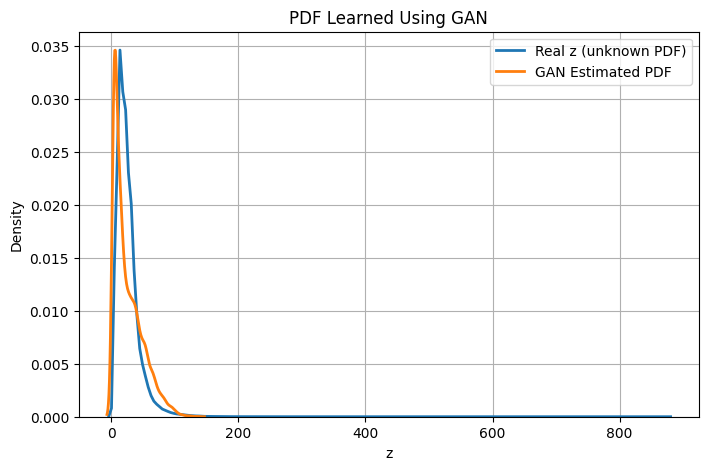

In [45]:
plt.figure(figsize=(8, 5))

sns.kdeplot(z, label="Real z (unknown PDF)", linewidth=2)
sns.kdeplot(z_fake.flatten(), label="GAN Estimated PDF", linewidth=2)

plt.xlabel("z")
plt.ylabel("Density")
plt.title("PDF Learned Using GAN")
plt.legend()
plt.grid(True)
plt.show()